# **Outline**

This notebook contains description & code for the GUVI DL Capstone Project - [SignBoard Translation](https://ai4bharat.org/articles/sign-board) from Indian Vernacular Languages

**Objective:**

To build an end-to-end Deep Learning model for scene text detection, recognition and tranlsiteration that will involve translation of signboards (highway, roads, railway station, public areas etc.) from Indian vernacular languages (Hindi for this specific project) to English making travel and tourism easier in India

**Applications:**

Making a mobile app that will translate Indian signboards to English will promote toursim accross different states of India and International community. With the vast amount of diversity in language and culture in India. It might become difficult for international tourists and domenstic toursists from other states to travel across India. Deploying a lite ML model as a mobile and web application will be extremely helpful for travellers who  communicate in the native languages and only know English.

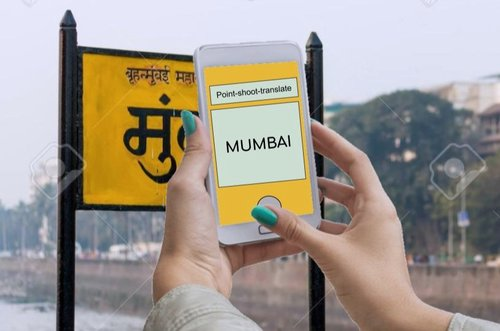

**Approach:**

There is a need to be build an end-to-end model that will perform scene text regonition, individual character recognition and traslate/transliterate to English. Ther is a need to exploit computer vision, natural language processing and related deep learning that will involve CV-NLP combination to solve this problem. This approach uses a combination of three modules individually trained for one of the specific tasks. These are the folowing tasks and the respective models used:

1.   **Scene text detection**
*   Objective: Detect bounding boxes across the text
*   Model: CNN (Pre-trained) to extract bounding boxes of text


2.   **Text Recognition**
*   Objective: Detect bounding boxes across the text
*   Model: CRNN (Convolutional Recurrent Neural Network) whcih is a Encoder-Decoder architecture with CNN Encoder and RNN Decoder


3.   **Transliteration**
*   Objective: Translate/Transliterate hindi (or any other vernacular languages) to english
*   Model: Seq2Seq model with attention

All these modules individually traind will run in unison in the above specified order, where given an image input containing signboard will output out the english meaning of that signboard






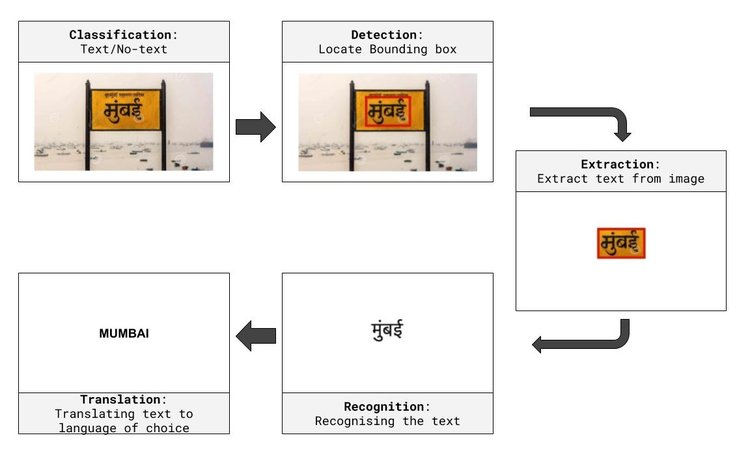

## **Details of the provided datasets**

A synthetic dataset for training detection and recognition modules is available. Train dataset for tranliteration is availble. Test datasets for detection, recognition and finally transliteraion are also available. Following are the details of each of the dataset and the nomenclature involved.

**DataSet1 - Synthetic Dataset**

The whole Dataset is divided into three part for flexibility.
- Each part consists of two folders 1. Annotation, 2. Image
- The Dataset consist of approx ~ 100,000 Images, along with their annotations.
- The Images and Annotations are distributed among 25 folders, which have serial no. 1 to 25.
- Annotation for a particular image can be found in corresponding serial no. Folder for annotation with the same name. E.g., Image 4.jpg in Folder 2 in Image folder will have it's annotation in Folder 2 inside Annotation Directory with the name 4.txt.

***Understanding Annotation file:***

- Each line in the annotation file represents a word bounding box.
- Suppose there are four lines of text in a file, then there will be 4-word bounding will be there in the image.
- The last word of each line represents ground truth.
- The first four value of line represents x1, x2, x3, x4, which are x-coordinate in clockwise order. x1 represent top-left, x2 represent top-right, x3 represent bottom-right, x4 represent bottom left.
- Similarly, after the first four next four represents y1, y2, y3, y4, which are x-coordinate in clockwise order. y1 represents top-left, y2 represent top-right, y3 represents bottom-right, y4 represent bottom left.
- A line can be seen as x1_x2_x3_x4_y1_y2_y3_y4_groundTruth, where '_' represents single space.

An example of an annotation file is.

15.025299 79.619064 91.971375 27.37761 111.49409 87.36937 120.44259 144.5673 और

195.26416 345.93964 346.07916 195.40369 296.7271 296.54498 411.9508 412.13293 किस

544.8015 579.83813 541.4978 506.46115 42.720642 60.455795 136.19897 118.46382 दिन

275.59427 311.88095 302.1434 265.85672 134.48518 159.5067 173.62825 148.60674 रूप

30.469978 163.88913 164.9093 31.490135 182.98358 181.51782 274.3758 275.84155 इस

33.57235 184.95844 185.26584 33.879738 354.1837 353.62552 436.9943 437.55246 तरह

-2.6164436 45.761616 53.37768 4.9996223 155.51007 137.70114 158.39023 176.19916 साथ

343.8163 512.32336 512.94495 344.4379 134.2903 132.54332 192.49599 194.24297 एकाएक

337.52948 504.81384 505.13098 337.84662 241.95956 240.91986 291.94846 292.98816 रमानाथ

507.9361 555.0499 523.0799 475.96606 4.7673645 56.682793 85.69593 33.780502 गया

It consists of 10 lines, so 10-word level bounding boxes are there. GroundTruth is the last.
x1 x2 x3 x4 y1 y2 y3 y4 order is there.




**DataSet2 - Real Image Dataset for final test**

- This dataset consists of 428 real images in the image folder. Annotation corresponding to image presents in Annotation folder.
- The Annotation for the image has the same name that of the image just with the difference of extension. For example, if the image name is "1.jpg" then the corresponding annotation will be "1.txt".
- The format for the storage of the annotation file is as such.
- The no. of the line in annotation line denotes no of bounding box presents.
- A single line represents a single bounding box. format is as follow x1, x2, x3, x4, y1, y2, y3, y4, groundTruth::Language. Where (x1,y1) is the top left, (x2,y2) is top right, (x3,y3) bottom right, (x4,y4) bottom left.
- the order of point is in the clockwise order starting from the top-left points.
- if the text is not recognizable or ground truth is not known, the ## is used for that representation.
- For all of the image in the ground, truth is considered as ## only.
- Though in most of the bounding box Hindi is the language in some cases English is also present. Language other than Hindi and English is considered as "other."



**DataSet3 - Cropped Image Dataset for testing CRNN**

- Cropped_dir consist of 1740 cropped word images.
- The ground truth detail is presents in the annotation.txt file.
- Annotation.txt list location of the image file (relative to parent cropped_dir), followed ground truth, followed by parent file location, followed by location from where it is cropped in parent. All information is sepreated by the tab '\t'.
- Only single language is there that is hindi.

Resources

https://github.com/Lyken17/Efficient-PyTorch - LMDB and CNN Tutorial (Best Practices)



This software implements the Convolutional Recurrent Neural Network (CRNN), a combination of CNN, RNN and CTC loss for image-based sequence recognition tasks, such as scene text recognition and OCR. For details, please refer to our paper http://arxiv.org/abs/1507.05717.

Actual implementation by authors in (torch and lua) is [here](https://github.com/bgshih/crnn).

PyTorch Implementation is [here](https://github.com/meijieru/crnn.pytorch/blob/master/README.md).


# **Importing or Installing Dependencies**

In [ ]:
import os
from PIL import Image
from IPython.display import clear_output
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
import torch.utils.data
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms
from torch.nn import CTCLoss
import numpy as np
import matplotlib.pyplot as plt;plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
from IPython.display import clear_output
import random
import tarfile
from __future__ import print_function
from __future__ import division
import argparse
import collections
from collections import OrderedDict
from tqdm.notebook import trange, tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu
bleu = sentence_bleu
cc = SmoothingFunction()
import warnings
warnings.filterwarnings('ignore')

device_gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");print(device_gpu)

cuda:0


In [ ]:
!pip install pytorch-nlp
from torchnlp.metrics import get_moses_multi_bleu as bleu

     |████████████████████████████████| 92kB 4.4MB/s 


In [ ]:
!python --version
!nvcc --version #CUDA > 8.0
!pip install lmdb

Python 3.6.9
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


**Requirements** according to crnn.pytorch github repo

lmdb==0.97
numpy==1.17.2
Pillow==6.1.0
six==1.12.0
torch==1.2.0
torchvision==0.4.0

### Loading CRNN Model from GITHUB

In [ ]:
if not os.getcwd() == '/content':
    os.chdir('/content')
if not os.path.isdir('crnn.pytorch'):
    !git clone https://github.com/meijieru/crnn.pytorch.git

Cloning into 'crnn.pytorch'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 82 (delta 0), reused 0 (delta 0), pack-reused 81
Unpacking objects: 100% (82/82), done.


In [ ]:
#Run this Magic Command before training
#It will not allow disconnection in Google Colab
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect,100000)

<IPython.core.display.Javascript object>

# **Hindi Dataset Creation**

## Creating Cropped Synthetic DataSet for CRNN from the [FullSize Hindi Synthetic Dataset](https://drive.google.com/open?id=1E5kI8CLoC-XffqQMTWwSpBIPp1Wb2tne)

In [ ]:
!apt-get install p7zip-full
#First Upload the FullSize Synthetic Hindi Dataset to your google drive
#Then mount drive to google collab notebook session
!7z x '/content/drive/My Drive/DATASETS/Synthetic Train Set (100k) - Detection & Recognition.tar.7z'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
^C

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/My Drive/DATASETS/                                           
ERROR: No more files
/content/drive/My Drive/DATASETS/Synthetic Train Set (100k) - Detection & Recognition.tar.7z



System ERROR:
Unknown error -2147024872


In [ ]:
!apt-get install p7zip-full
!7z x '/content/drive/My Drive/DATASETS/recognition_real_dataset.tar.7z'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/My Drive/DATASETS/                                           
ERROR: No more files
/content/drive/My Drive/DATASETS/recognition_real_dataset.tar.7z



System ERROR:
Unknown error -2147024872


## Generating Cropped Data Finally!

In [ ]:
%%time
if not os.path.isdir('/content/SynthCropped'):
    os.mkdir('/content/SynthCropped')
    os.mkdir('/content/SynthCropped/Imgs')

with open('/content/SynthCropped/SynthCropped.txt','a') as f_SynthCropped:
    # folders = [1,4,10,15]
    folders = list(range(1,26))
    full_cnt = 0
    for i in folders:
        cnt = 0
        basepath_Image = '/content/Synth/Image/' + str(i) + '/'
        basepath_Annotation = '/content/Synth/Annotation/' + str(i) + '/'
        output_Ipath = '/content/SynthCropped/Imgs/' + str(i) + '--'
        Ipaths = os.listdir(basepath_Image[:-1])
        Apaths = os.listdir(basepath_Annotation[:-1])
        Ipaths.sort();Apaths.sort()
        for I,A in zip(Ipaths,Apaths):
            if(I.split('.')[0] == A.split('.')[0]):
                with open(basepath_Annotation + A,'r',encoding='utf8') as f:
                    annot_Lines = f.readlines()
                    img = Image.open(basepath_Image + I)
                    for line in annot_Lines:
                        cnt += 1
                        line_split = line.split(' ')
                        aa = [int(float(a)) for a in line_split[:-1]]
                        xmin, xmax = min(aa[:4]),max(aa[:4])
                        ymin, ymax = min(aa[4:]),max(aa[4:])
                        img_crop = img.crop((xmin, ymin, xmax, ymax))
                        cropImage_name = output_Ipath + str(cnt) + '.jpg'
                        img_crop.save(cropImage_name)
                        f_SynthCropped.writelines(cropImage_name + ' ' + line_split[-1])
                        # print(cropImage_name + ' ' + line_split[-1])
        full_cnt += cnt
        print('Folder: %d %d %d' % (i, cnt, full_cnt))

#TOTAL CROPPED IMAGES (for FULL Folders) - 671333
#Compute Time - 8 minutes for Synthetic 100k dataset

In [ ]:
tarfile_name = "/content/SynthCropped_full.tar.gz"
# tarfile_name = "/content/SynthCropped_1-4-10-15.tar.gz"
tar = tarfile.open(tarfile_name, "w:gz")
os.chdir("/content/SynthCropped")
for name in os.listdir("."):
    tar.add(name)
tar.close()
os.chdir('/content')

In [ ]:
tarfile_name = "/content/saved_models_0.tar.gz"
tar = tarfile.open(tarfile_name, "w:gz")
os.chdir("/content/drive/My Drive/DATASETS/CRNN_currUse/saved_models_0")
for name in os.listdir("."):
    tar.add(name)
tar.close()
os.chdir('/content')

## **Extract Test/Train Data Folders from Google Drive**

In [ ]:
!rm -rf '/content/RecogTestCropped'
!rm -rf '/content/SynthCropped'
!rm -rf '/content/sample_data'
!rm -rf '/content/Synth'

if not os.path.isdir('/content/SynthCropped'):
    os.mkdir('/content/SynthCropped')

if not os.getcwd() == '/content/SynthCropped':
    os.chdir('/content/SynthCropped')

!tar -xvf  '/content/drive/My Drive/DATASETS/SynthCropped_full.tar.gz'

if not os.getcwd() == '/content':
    os.chdir('/content')
    
!tar -xvf  '/content/drive/My Drive/DATASETS/cropped_data.tar'
os.rename('/content/cropped_data', '/content/RecogTestCropped')

Streaming output truncated to the last 5000 lines.
Imgs/23--4263.jpg
Imgs/12--1902.jpg
Imgs/12--19715.jpg
Imgs/3--12132.jpg
Imgs/5--9858.jpg
Imgs/4--1292.jpg
Imgs/23--24834.jpg
Imgs/19--14245.jpg
Imgs/24--17043.jpg
Imgs/13--9516.jpg
Imgs/5--21471.jpg
Imgs/17--18736.jpg
Imgs/7--2738.jpg
Imgs/4--8648.jpg
Imgs/15--704.jpg
Imgs/16--9324.jpg
Imgs/22--11840.jpg
Imgs/19--4466.jpg
Imgs/8--18699.jpg
Imgs/7--6566.jpg
Imgs/12--5600.jpg
Imgs/24--24317.jpg
Imgs/3--18134.jpg
Imgs/13--18977.jpg
Imgs/20--29790.jpg
Imgs/17--9668.jpg
Imgs/8--6380.jpg
Imgs/1--13137.jpg
Imgs/9--12139.jpg
Imgs/11--25808.jpg
Imgs/21--1011.jpg
Imgs/4--7618.jpg
Imgs/1--4928.jpg
Imgs/25--4471.jpg
Imgs/18--4203.jpg
Imgs/6--9075.jpg
Imgs/10--20793.jpg
Imgs/8--13532.jpg
Imgs/15--15036.jpg
Imgs/4--14943.jpg
Imgs/2--13129.jpg
Imgs/23--15911.jpg
Imgs/1--25579.jpg
Imgs/10--26.jpg
Imgs/14--9934.jpg
Imgs/7--15655.jpg
Imgs/23--16718.jpg
Imgs/13--882.jpg
Imgs/18--4404.jpg
Imgs/12--14987.jpg
Imgs/23--14665.jpg
Imgs/11--2981.jpg
Imgs/17--2

# **CRNN Model for Text Recognition**

## Acknowledgement & Credits

* Actual Implementation by authors: [CRNN Actual](https://github.com/bgshih/crnn)
* PyTorch Implementation of CRNN: [CRNN PyTorch Port](https://github.com/meijieru/crnn.pytorch)

Thanks to [Jieru Mei](https://github.com/meijieru) for sharing CRNN PyTorch impleentation publicly as a github repository.

Different cells contain different classes and code for model, training, validation and testing along with Visualization

I have modified the CRNN network slightly as per need


## Helper Functions

In [ ]:
#Utility functions designed as classes and class methods to operate on objects
class averager(object):
    def __init__(self):
        self.reset()

    def add(self, v):
        if isinstance(v, Variable):
            count = v.data.numel()
            v = v.data.sum()
        elif isinstance(v, torch.Tensor):
            count = v.numel()
            v = v.sum()
        self.n_count += count
        self.sum += v

    def reset(self):
        self.n_count = 0
        self.sum = 0

    def val(self):
        res = 0
        if self.n_count != 0:
            res = self.sum / float(self.n_count)
        return res

class strLabelConverter(object):
    def __init__(self, alphabet, ignore_case = False):
        self._ignore_case = ignore_case
        if self._ignore_case:
            alphabet = alphabet.lower()
        self.alphabet = alphabet + '-'
        self.dict = {}
        for i, char in enumerate(alphabet):
            self.dict[char] = i + 1

    def encode(self, text):
        if isinstance(text, str):
            text = [ self.dict[char.lower() if self._ignore_case else char] for char in text]
            length = [len(text)]
        elif isinstance(text, collections.Iterable):
            length = [len(s) for s in text]
            text = ''.join(text)
            text, _ = self.encode(text)
        return (torch.IntTensor(text), torch.IntTensor(length))

    def decode(self, t, length, raw=False):
        if length.numel() == 1:
            length = length[0]
            assert t.numel() == length, "text with length: {} does not match declared length: {}".format(t.numel(), length)
            if raw:
                return ''.join([self.alphabet[i - 1] for i in t])
            else:
                char_list = []
                for i in range(length):
                    if t[i] != 0 and (not (i > 0 and t[i - 1] == t[i])):
                        char_list.append(self.alphabet[t[i] - 1])
                return ''.join(char_list)
        else:
            # batch mode
            assert t.numel() == length.sum(), "texts with length: {} does not match declared length: {}".format(t.numel(), length.sum())
            texts = []
            index = 0
            for i in range(length.numel()):
                l = length[i]
                texts.append(
                    self.decode(
                        t[index:index + l], torch.IntTensor([l]), raw=raw))
                index += l
            return texts

In [ ]:
def oneHot(v, v_length, nc):
    batchSize = v_length.size(0)
    maxLength = v_length.max()
    v_onehot = torch.FloatTensor(batchSize, maxLength, nc).fill_(0)
    acc = 0
    for i in range(batchSize):
        length = v_length[i]
        label = v[acc:acc + length].view(-1, 1).long()
        v_onehot[i, :length].scatter_(1, label, 1.0)
        acc += length
    return v_onehot

def loadData(v, data):
    with torch.no_grad():
        v.resize_(data.size()).copy_(data)

def prettyPrint(v):
    print('Size {0}, Type: {1}'.format(str(v.size()), v.data.type()))
    print('| Max: %f | Min: %f | Mean: %f' % (v.max().data[0], v.min().data[0],v.mean().data[0]))
    
def assureRatio(img):
    """Ensure imgH <= imgW."""
    b, c, h, w = img.size()
    if h > w:
        main = nn.UpsamplingBilinear2d(size=(h, h), scale_factor=None)
        img = main(img)
    return img

# custom weights initialization called on crnn
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [ ]:
#Custom funcions written by me for torch dataloder, instead of lmdb dataset that is used

#There are about 21 images with numbers in Arabic/Hindi in the train dataset.
#So we will ignore training/testing for numerical characters
class SynthCrop_HINDI_TEXTRECOG_DataSet(Dataset):
    def __init__(self, dir_path, train=True,transform=None):
        self.transform = transform
        self.annotation_file_path = os.path.join(dir_path,'SynthCropped.txt')
        self.train=train
        self.dataset_annotations = []
        hindi_num_set = set([chr(alpha) for alpha in range(2406, 2416)])
        with open(self.annotation_file_path,'rt') as f_txt:
            textfile_lines = f_txt.readlines()
            for line in textfile_lines:
                line_split = line[:-1].split(' ') #Ignoring '\n' in label
                i_name, l_name = line_split[0],line_split[1]
                if not (set(l_name).intersection(hindi_num_set)):
                    self.dataset_annotations.append((i_name, l_name))
        self.len = len(self.dataset_annotations)

    def __len__(self):
        return len(self.dataset_annotations)
    
    def __getitem__(self, index):
        image_data = self.pil_loader(self.dataset_annotations[index][0])
        if self.transform:
            image_data = self.transform(image_data)
        label_data = self.dataset_annotations[index][1]
        return image_data, label_data

    def pil_loader(self,path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

class SynthCrop_HINDI_TEXTRECOG_DataSet_testing(Dataset):
    def __init__(self, dir_path, train=True,transform=None):
        self.transform = transform
        self.dir_path = dir_path
        self.annotation_file_path = os.path.join(self.dir_path,'annotations.txt')
        self.train=train
        self.dataset_annotations = []
        hindi_num_set = set([chr(alpha) for alpha in range(2406, 2416)])
        with open(self.annotation_file_path,'rt') as f_txt:
            textfile_lines = f_txt.readlines()
            for line in textfile_lines:
                line_split = line.split()
                i_name, l_name = line_split[0],line_split[1]
                if not (set(l_name).intersection(hindi_num_set)):
                    self.dataset_annotations.append((i_name, l_name))
        self.len = len(self.dataset_annotations)

    def __len__(self):
        return len(self.dataset_annotations)
    
    def __getitem__(self, index):
        image_data = self.pil_loader(os.path.join(self.dir_path,self.dataset_annotations[index][0]))
        if self.transform:
            image_data = self.transform(image_data)
        label_data = self.dataset_annotations[index][1]
        return image_data, label_data

    def pil_loader(self,path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

In [ ]:
def get_mean_std(data_loader):
    ch_sum, ch_sum_sqrd, n_batches = 0.0,0.0,0.0
    for data, _ in tqdm(data_loader) :
        #computing per channel mean/std for each image and adding it up
        ch_sum += torch.mean(data,dim=[0,2,3]) 
        ch_sum_sqrd += torch.mean(data**2, dim=[0,2,3])
        n_batches += 1 
    
    mean = (ch_sum/n_batches)
    std = (ch_sum_sqrd/n_batches - mean**2)**0.5
    return mean,std

#get_mean_std(train_loader)
#Output of this function on train_loader dataset is:
#(tensor([0.4560, 0.4620, 0.4657]), tensor([0.2642, 0.2604, 0.2872]))
#mean per channel - [0.4560, 0.4620, 0.4657] 
#sd per chennal - [0.2642, 0.2604, 0.2872]

## **Model**

In [ ]:
class BidirectionalLSTM(nn.Module):
    def __init__(self, nIn, nHidden, nOut,dropout = True):
        super(BidirectionalLSTM, self).__init__()
        if dropout:
            self.rnn = nn.LSTM(nIn, nHidden, dropout = 0.2, bidirectional=True)
        else:
            self.rnn = nn.LSTM(nIn, nHidden, bidirectional=True)
        self.embedding = nn.Linear(nHidden*2, nOut)

    def forward(self, input):
        recurrent, _ = self.rnn(input)
        T, b, h = recurrent.size()
        t_rec = recurrent.view(T * b, h)
        output = self.embedding(t_rec)  # [T * b, nOut]
        output = output.view(T, b, -1)
        return output

class CRNN(nn.Module):
    def __init__(self, imgH, nc, nclass, nh, n_rnn=2):
        super(CRNN, self).__init__()
        assert imgH % 16 == 0, 'imgH has to be a multiple of 16'
        ks = [3, 3, 3, 3, 3, 3, 2]
        ps = [1, 1, 1, 1, 1, 1, 0]
        ss = [1, 1, 1, 1, 1, 1, 1]
        nm = [64, 128, 256, 256, 512, 512, 512]
        cnn = nn.Sequential()
    
        def convRelu(i, dropOut = False, batchNormalization=True, leakyRelu = True):
            nIn = nc if i == 0 else nm[i - 1]
            nOut = nm[i]
            cnn.add_module('conv{0}'.format(i), nn.Conv2d(nIn, nOut, ks[i], ss[i], ps[i]))
            if batchNormalization:
                cnn.add_module('batchnorm{0}'.format(i), nn.BatchNorm2d(nOut))
            if leakyRelu:
                cnn.add_module('relu{0}'.format(i),nn.LeakyReLU(0.2, inplace=True))
            else:
                cnn.add_module('relu{0}'.format(i), nn.ReLU(True))

            if dropOut:
                cnn.add_module('dropout{0}'.format(i), nn.Dropout(0.2))

        convRelu(0)
        cnn.add_module('pooling{0}'.format(0), nn.MaxPool2d(2, 2))  # 64x16x64
        convRelu(1)
        cnn.add_module('pooling{0}'.format(1), nn.MaxPool2d(2, 2))  # 128x8x32
        convRelu(2)
        convRelu(3)
        cnn.add_module('pooling{0}'.format(2), nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 256x4x16
        convRelu(4)
        convRelu(5)
        cnn.add_module('pooling{0}'.format(3),nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 512x2x16
        convRelu(6,batchNormalization=False)  # 512x1x16

        self.cnn = cnn
        self.rnn = nn.Sequential(
            BidirectionalLSTM(512, nh, nh, dropout = True),
            BidirectionalLSTM(nh, nh, nclass, dropout = False) )

    def forward(self, input):
        conv = self.cnn(input)
        b, c, h, w = conv.size()
        # print(b,c,h,w)
        assert h == 1, "the height of conv must be 1"
        conv = conv.squeeze(2)
        conv = conv.permute(2, 0, 1)  # [w, b, c]
        output = self.rnn(conv)
        return output

## Training & Test Scene Text Recognition Task

### Parsing Argument - Assigning the Settings and Hyperparameters

In [ ]:
#ALL SETTINGS ARE HERE MOSTLY. This cell should be run after all class instantiations
parser = argparse.ArgumentParser()
#Creating string of hindi characters (without numbers) using Unicode convention
hindi_alphabets = ''
for alpha in range(2304, 2432):
    if not alpha in range(2406,2416):
        hindi_alphabets += chr(alpha)
parser.add_argument('--alphabet', type=str, default = hindi_alphabets)
parser.add_argument('--split_ratio', type=float, default=0.95, help='Ratio to split train dataset, train:validation = split_ratio')
parser.add_argument('--imgH', type=int, default=32, help='the height of the input image to network')
parser.add_argument('--imgW', type=int, default=100, help='the width of the input image to network')
parser.add_argument('--nh', type=int, default = 512, help='size of the lstm hidden state')
parser.add_argument('--cuda', action='store_false', help='enables cuda')
parser.add_argument('--ngpu', type=int, default=1, help='number of GPUs to use')
parser.add_argument('--keep_ratio', action='store_true', help='whether to keep ratio for image resize')
parser.add_argument('--manualSeed', type=int, default=1234, help='reproduce experiment')

parser.add_argument('--batch_size', type=int, default=128, help='input batch size')
parser.add_argument('--test_batch_size', type=int, default=8, help='test batch size')
parser.add_argument('--lr', type=float, default=0.005, help='learning rate for Critic, not used by adadealta')
parser.add_argument('--beta1', type=float, default=0.7, help='beta1 for adam. default=0.5')
parser.add_argument('--adam', action='store_true', help='Whether to use adam (default is rmsprop)')
parser.add_argument('--adadelta', action='store_false', help='Whether to use adadelta (default is rmsprop)')
parser.add_argument('--pretrained', default='/content/drive/My Drive/DATASETS/CRNN_currUse/saved_models/netCRNN_14_4983.pth', help="path to pretrained model")
parser.add_argument('--out_dir', default='saved_models', help='Where to store samples and models')
parser.add_argument('--out_gdrive_dir', default='/content/drive/My Drive/DATASETS/CRNN_currUse/saved_models', help='Path to save models to Google Drive')
parser.add_argument('--nepoch', type=int, default=15, help='number of epochs to train for')
parser.add_argument('--val_max_iter', type=int, default=2000, help='Max num of val iterations')
parser.add_argument('--n_test_disp', type=int, default=10, help='Number of samples to display when test')
parser.add_argument('--trainInterval', type=int, default=100, help='Interval to be displayed')
parser.add_argument('--valInterval', type=int, default=500, help='Interval to be displayed')
parser.add_argument('--saveInterval', type=int, default=1000, help='Interval to be displayed')
parser.add_argument('--display_loss', action='store_false', help='Whether to display loss plot or not')
settings = parser.parse_args('')
print(settings,'\n')

#nc - number of input channels, nclass - dictionary size (#num classes)
nclass = len(settings.alphabet) + 1
nc = 3
# transform_crnn = transforms.Compose([ transforms.ColorJitter(), transforms.Resize((32,100)),transforms.ToTensor(), transforms.Normalize((0.4560, 0.4620, 0.4657), (0.2642, 0.2604, 0.2872))])
transform_crnn = transforms.Compose([ transforms.Resize((32,100)),transforms.ToTensor(), transforms.Normalize((0.4560, 0.4620, 0.4657), (0.2642, 0.2604, 0.2872))])
full_data = SynthCrop_HINDI_TEXTRECOG_DataSet('/content/SynthCropped', train = True, transform = transform_crnn)
train_size = int(settings.split_ratio * len(full_data))
val_size = len(full_data) - train_size
train_data, val_data = random_split(full_data, [train_size,val_size])
train_loader = torch.utils.data.DataLoader(train_data, batch_size = settings.batch_size, num_workers = 2, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size = settings.batch_size, num_workers = 2, shuffle=True)
test_data = SynthCrop_HINDI_TEXTRECOG_DataSet_testing('/content/RecogTestCropped', train = False, transform = transform_crnn)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = settings.test_batch_size, num_workers = 1, shuffle=True)
print("Train (Full) Dataset Size: ", full_data.__len__())
print("Train (Train) Dataset Size: ", train_data.__len__())
print("Train (Validation) Dataset Size: ", val_data.__len__())
print("Test Dataset Size: ", test_data.__len__())
print("Train DataLoader Size: ", len(train_loader))
print("Validation DataLoader Size: ", len(val_loader))
print("Test DataLoader Size: ", len(test_loader))
print("Input Channels: ", nc)
print("Vocabulary Size: ", nclass)
print("Hindi Dictionary: ", settings.alphabet)

if not os.path.exists(settings.out_dir):
    os.makedirs(settings.out_dir)
random.seed(settings.manualSeed)
np.random.seed(settings.manualSeed)
torch.manual_seed(settings.manualSeed)
cudnn.benchmark = True

image = torch.FloatTensor(settings.batch_size, 3, settings.imgH, settings.imgH)
text = torch.IntTensor(settings.batch_size * 5)
length = torch.IntTensor(settings.batch_size)
image = Variable(image)
text = Variable(text)
length = Variable(length)

#Instantiating Model
crnn = CRNN(settings.imgH, nc, nclass, settings.nh)
crnn.apply(weights_init)
if settings.pretrained != '':
    print('Loading PreTrained Model from %s' % settings.pretrained)
    state_dict = torch.load(settings.pretrained)
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k[7:] # remove "module."
        new_state_dict[name] = v
    crnn.load_state_dict(new_state_dict)

#Utilities
converter = strLabelConverter(settings.alphabet)
criterion = CTCLoss()
loss_avg = averager()
if settings.adam:
    optimizer = optim.AdamW(crnn.parameters(), lr=settings.lr, betas=(settings.beta1, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=True)
elif settings.adadelta:
    optimizer = optim.Adadelta(crnn.parameters())
else:
    optimizer = optim.RMSprop(crnn.parameters(), lr=settings.lr)

#CUDA settings
if torch.cuda.is_available() and not settings.cuda:
    print("WARNING: You have a CUDA device, so you should probably run with --cuda")
if settings.cuda:
    crnn.cuda()
    crnn = torch.nn.DataParallel(crnn, device_ids=range(settings.ngpu))
    image = image.cuda()
    criterion = criterion.cuda()

Namespace(adadelta=True, adam=False, alphabet='ऀँंःऄअआइईउऊऋऌऍऎएऐऑऒओऔकखगघङचछजझञटठडढणतथदधनऩपफबभमयरऱलळऴवशषसहऺऻ़ऽािीुूृॄॅॆेैॉॊोौ्ॎॏॐ॒॑॓॔ॕॖॗक़ख़ग़ज़ड़ढ़फ़य़ॠॡॢॣ।॥॰ॱॲॳॴॵॶॷॸॹॺॻॼॽॾॿ', batch_size=128, beta1=0.7, cuda=True, display_loss=True, imgH=32, imgW=100, keep_ratio=False, lr=0.005, manualSeed=1234, n_test_disp=10, nepoch=15, ngpu=1, nh=512, out_dir='saved_models', out_gdrive_dir='/content/drive/My Drive/DATASETS/CRNN_currUse/saved_models', pretrained='/content/drive/My Drive/DATASETS/CRNN_currUse/saved_models/netCRNN_14_4983.pth', saveInterval=1000, split_ratio=0.95, test_batch_size=8, trainInterval=100, valInterval=500, val_max_iter=2000) 

Train (Full) Dataset Size:  671312
Train (Train) Dataset Size:  637746
Train (Validation) Dataset Size:  33566
Test Dataset Size:  1712
Train DataLoader Size:  4983
Validation DataLoader Size:  263
Test DataLoader Size:  214
Input Channels:  3
Vocabulary Size:  119
Hindi Dictionary:  ऀँंःऄअआइईउऊऋऌऍऎएऐऑऒओऔकखगघङचछजझञटठडढणतथदधनऩपफबभमयरऱलळऴवशषसहऺऻ़ऽािीुूृॄॅॆेैॉॊो

### Network Architecture

In [ ]:
print('############### Network Architecture ######################')
print(crnn,'\n')
print('Number of total parameters in CRNN model: %d (%0.2f million)' % (sum(p.numel() for p in crnn.parameters()),sum(p.numel() for p in crnn.parameters())/1000000 ))

############### Network Architecture ######################
DataParallel(
  (module): CRNN(
    (cnn): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batchnorm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): LeakyReLU(negative_slope=0.2, inplace=True)
      (pooling0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batchnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): LeakyReLU(negative_slope=0.2, inplace=True)
      (pooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batchnorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): LeakyReLU(negative_

### Train Loop

हे----------त------------- => हेत                 , gt: हेतु                
रह------------------------ => रह                  , gt: है                  
गु----------रर------------ => गुर                 , gt: गुर्रा              
से------न-्टट-----र------- => सेन्टर              , gt: सेन्टर              
वव-------व---ररर्--------- => ववर्                , gt: वर्क्स              
आई------------------------ => आई                  , gt: भाई                 
बज----------र----णण------- => बजरण                , gt: बजरंग               
भी------------------------ => भी                  , gt: श्री                
Validation loss: 0.203929, accuray: 0.017961


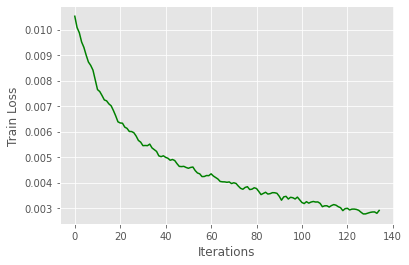

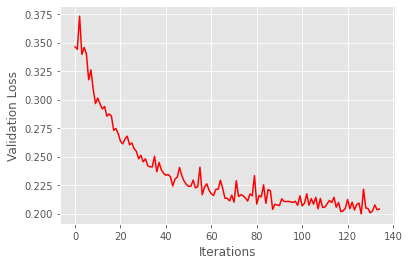

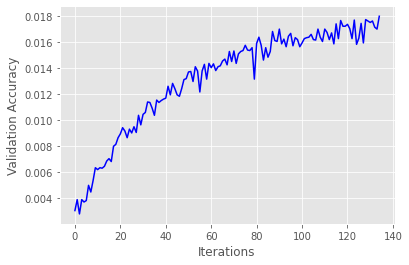

[14/15][4600/4983] Loss: 0.002737
[14/15][4700/4983] Loss: 0.002784
[14/15][4800/4983] Loss: 0.002762
[14/15][4900/4983] Loss: 0.002757


In [ ]:
TRAIN_LOSS_LIST = []
VAL_LOSS_LIST = []
VAL_ACC_LIST = []
min_val_loss = 1000

for epoch in range(settings.nepoch):
    train_iter = iter(train_loader)
    i = 0
    while i < len(train_loader):
        for p in crnn.parameters():
            p.requires_grad = True
        crnn.train()

        cost = trainBatch(crnn, criterion, optimizer)
        loss_avg.add(cost)
        i += 1

        if i % settings.trainInterval == 0:
            print('[%d/%d][%d/%d] Loss: %f' % (epoch, settings.nepoch, i, len(train_loader), loss_avg.val()))

        if i % settings.valInterval == 0:
            clear_output(wait=True)
            TRAIN_LOSS_LIST.append(loss_avg.val())
            loss_avg.reset()
            val_loss,val_acc = val(crnn, test_loader, criterion)
            VAL_LOSS_LIST.append(val_loss)
            VAL_ACC_LIST.append(val_acc)
            if min_val_loss > val_loss:
                min_val_loss = val_loss
            if(settings.display_loss):
                plt.plot(TRAIN_LOSS_LIST,'g',label = 'train_loss');plt.xlabel('Iterations');plt.ylabel('Train Loss');plt.show()
                plt.plot(VAL_LOSS_LIST,'r',label = 'val_loss');plt.xlabel('Iterations');plt.ylabel('Validation Loss');plt.show()
                plt.plot(VAL_ACC_LIST,'b');plt.xlabel('Iterations');plt.ylabel('Validation Accuracy');plt.show()

        # Checkpointing
        if (i % settings.saveInterval == 0) and (min_val_loss > val_loss):
            torch.save(crnn.state_dict(), '{0}/netCRNN_{1}_{2}.pth'.format(settings.out_dir, epoch, i))
    
    #Early Stopping using Validation Loss trend
    stop_list = VAL_LOSS_LIST[-4:]
    if all(i < j for i, j in zip(stop_list, stop_list[1:])):
        print("EARLY STOPPING HURRAY")
        torch.save(crnn.state_dict(), '{0}/netCRNN_{1}_{2}.pth'.format(settings.out_dir, epoch, i))
        torch.save(crnn.state_dict(), '{0}/netCRNN_{1}_{2}.pth'.format(settings.out_gdrive_dir, epoch, i))
        break
            
    torch.save(crnn.state_dict(), '{0}/netCRNN_{1}_{2}.pth'.format(settings.out_gdrive_dir, epoch, i))

In [ ]:
def val(net, data_loader, criterion, max_iter=settings.val_max_iter):

    print('Start validation')
    for p in crnn.parameters():
        p.requires_grad = False
    net.eval();val_iter = iter(data_loader)
    i = 0;n_correct = 0
    loss_avg = averager()

    max_iter = min(max_iter, len(data_loader))
    for i in range(max_iter):
        data = val_iter.next()
        i += 1
        cpu_images, cpu_texts = data
        batch_size = cpu_images.size(0)
        loadData(image, cpu_images)
        t, l = converter.encode(cpu_texts)
        loadData(text, t)
        loadData(length, l)

        preds = crnn(image)
        preds_size = Variable(torch.IntTensor([preds.size(0)] * batch_size))
        cost = criterion(preds, text, preds_size, length) / batch_size
        loss_avg.add(cost)

        _, preds = preds.max(2)
        preds = preds.transpose(1, 0).contiguous().view(-1)
        sim_preds = converter.decode(preds.data, preds_size.data, raw=False)
        for pred, target in zip(sim_preds, cpu_texts):
            if pred == target.lower():
                n_correct += 1

    raw_preds = converter.decode(preds.data, preds_size.data, raw=True)[:settings.n_test_disp]
    for raw_pred, pred, gt in zip(raw_preds, sim_preds, cpu_texts):
        print('%-20s => %-20s, gt: %-20s' % (raw_pred, pred, gt))

    accuracy = n_correct / float(max_iter * settings.batch_size)
    print('Validation loss: %f, accuray: %f' % (loss_avg.val(), accuracy))
    return loss_avg.val(), accuracy

def trainBatch(net, criterion, optimizer):
    data = train_iter.next()
    cpu_images, cpu_texts = data
    batch_size = cpu_images.size(0)
    loadData(image, cpu_images)
    t, l = converter.encode(cpu_texts)
    loadData(text, t)
    loadData(length, l)
    preds = crnn(image)
    preds_size = Variable(torch.IntTensor([preds.size(0)] * batch_size))
    #CTCLoss(input, target, input_lengths, target_lengths)
    cost = criterion(preds, text, preds_size, length) / batch_size
    crnn.zero_grad()
    cost.backward()
    optimizer.step()
    return cost

### Testing (Text Recognition) on real dataset

Start Testing


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['जिला', 'पंं', 'को', 'करना', 'रेल', 'मे', 'रबार', 'चनी']
('जिला', 'पढ़ें', 'को', 'वरना', 'रेल', 'में', 'दरबार', 'जमानी')


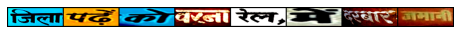

['शर्ागार', 'पसांद', 'भी', 'चर्थ्', 'र्व्ण', 'भी', 'सं्टरल', 'लोबा']
('शस्त्रागार', 'पसांद', 'श्री', 'स्वास्थ्य', 'स्वर्ण', 'श्री', 'सेंट्रल', 'मोबा')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


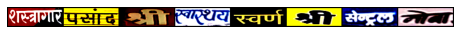

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['रग', 'रून', 'पर', 'दमने', 'घर', 'जर', 'व', 'भिलओ']
('दुर्गा', 'रेल', 'पर', 'बंगले', 'घर', 'जय', 'वॅा', 'मिटाओ')


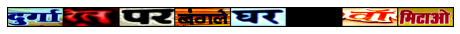

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['पर', 'आपक', 'दरत', 'इंाररसी', 'देर', 'घुी', 'कपया', 'इारसी']
('पेय', 'आपका', 'दांतों', 'इटारसी', 'के', 'पुरानी', 'कृपया', 'इटारसी')


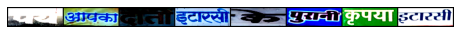

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['सुरा', 'अनाज', 'परिदण', 'एरं', 'अधनी', 'शहर', 'चेशटर', 'का']
('सुरक्षा', 'अनाज', 'प्रशिक्षण', 'एवं', 'अंथोनी', 'शहर', 'वेस्ट', 'कक्षा')


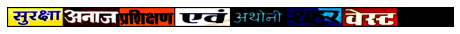

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['यही', 'बंगला', 'कपी', 'अपनी', 'सर्ताह', 'जील', 'एम', 'इधररे']
('यहाँ', 'बंगला', 'कॉपी', 'अपनी', 'सप्ताह', 'जीवन', 'एम', 'इटारसी')


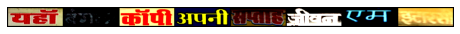

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['टिकिट', 'मुूरईंर', 'म्य', 'याभी', 'परिचम', 'नया', 'ती', 'इलहवाद']
('टिकट', 'मुस्कुराईए', 'मध्य', 'यात्री', 'पश्चिम', 'नया', 'वी', 'इलाहबाद')


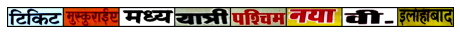

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['रेे', 'खेच्पता', 'राम', 'बाज', 'धूनियन', 'परिलक', 'कपी', 'रं']
('रेलवे', 'स्वच्छता', 'राम', 'बाजू', 'यूनियन', 'परिचालक', 'कॉपी', 'एवं')


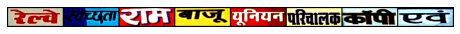

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['स्व््', 'करते', 'कई', 'धर्ावास', 'शाभ', 'फोई', 'रेल', 'दीवान']
('स्वच्छ', 'करते', 'कार्ड', 'छात्रावास', 'लाफ', 'फोड़े', 'रेल', 'दीवान')


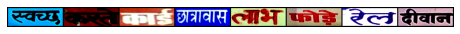

ल---------्््््््यय------- => ल्य                 , gt: लक्ष्य              
भो--------------ाल-------- => भोाल                , gt: भोपाल               
विि-----------ाा-न-------- => विान                , gt: विज्ञान             
रं---------ल-------------- => रंल                 , gt: रेल                 
आर-------------िििि------- => आरि                 , gt: आदि                 
हह--------लल-------------- => हल                  , gt: हॉल                 
धा-----------म------------ => धाम                 , gt: धाम                 
भा--------रर-----तत------- => भारत                , gt: भारत                
Test Loss: 0.232890, Accuray: 0.778848 Average BLEU 0.86270986727302


tensor(0.2329, device='cuda:0')

In [ ]:
def imshow(img, batch_size):
    npimg = img.numpy()
    plt.figure(figsize=(batch_size, 2))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_batch_images(images,labels,gt_labels,batch_size):
    img = torchvision.utils.make_grid(images)
    print(labels)
    print(gt_labels)
    imshow(img, batch_size)

def test(net, data_loader, criterion, max_iter=1000, display_batches = 10):
    print('Start Testing')
    for p in crnn.parameters():
        p.requires_grad = False
    net.eval();val_iter = iter(data_loader)
    i = 0;n_correct = 0
    loss_avg = averager()

    max_iter = min(max_iter, len(data_loader))

    avg_bleu = 0.0;size = 0
    correct_acc = 0.0;size_acc = 0

    for i in range(max_iter):
        data = val_iter.next()
        i += 1
        cpu_images, cpu_texts = data
        batch_size = cpu_images.size(0)
        loadData(image, cpu_images)
        t, l = converter.encode(cpu_texts)
        loadData(text, t)
        loadData(length, l)

        preds = crnn(image)
        preds_size = Variable(torch.IntTensor([preds.size(0)] * batch_size))
        cost = criterion(preds, text, preds_size, length) / batch_size
        loss_avg.add(cost)

        _, preds = preds.max(2)
        preds = preds.transpose(1, 0).contiguous().view(-1)
        sim_preds = converter.decode(preds.data, preds_size.data, raw=False)
        for pred, target in zip(sim_preds, cpu_texts):
            correct_acc += len(set(pred) & set(target))
            size_acc += min(len(target),len(pred))
            # size_acc += (len(target) + len(pred))/2
            if len(pred) >1 and len(target) >1: 
                avg_bleu += bleu(pred, target)*(len(target))
                size += len(target)

        if i < display_batches:
            show_batch_images(cpu_images,sim_preds,cpu_texts,batch_size)
    
    raw_preds = converter.decode(preds.data, preds_size.data, raw=True)[:settings.test_batch_size]
    for raw_pred, pred, gt in zip(raw_preds, sim_preds, cpu_texts):
        print('%-20s => %-20s, gt: %-20s' % (raw_pred, pred, gt))
    accuracy = correct_acc/size_acc;avg_bleu = avg_bleu/size
    print('Test Loss: %f, Accuray: %f Average BLEU' % (loss_avg.val(), accuracy),avg_bleu)
    return loss_avg.val()

test(crnn, test_loader, criterion)

# RESULTS

**TRAINING Phase 1**

**First Set of Training with Adadelta, batch_size = 128**

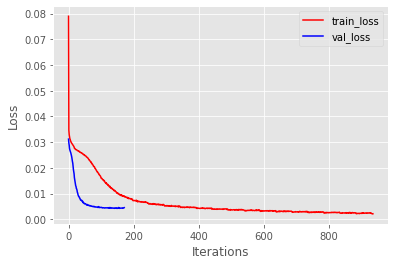

### Testing (Text Recognition) on real dataset

Start Testing


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['समम्ी', 'से', 'नव', 'नागपर', 'का', 'करता', 'पफनीचर', 'यह']
('समस्तीपुर', 'से', 'नव', 'नागपुर', 'कार्य', 'करता', 'फर्नीचर', 'यह')


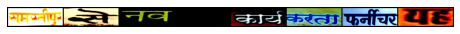

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['सफाई', 'मपड़ल', 'पिी', 'हई', 'बचन', 'का', 'पकि्वम', 'अधिनह']
('सफाई', 'मण्डल', 'पावनी', 'से', 'बचाओ', 'का', 'पश्चिम', 'अभिनन्दन')


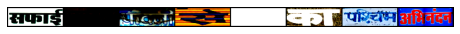

['तगर', 'बुनयानी', 'इंरसी', 'हाल', 'सान', 'पीन', 'लोको', 'सोीज्य']
('नगर', 'बुनयादी', 'इटारसी', 'हॉल', 'सोनी', 'पीने', 'लोको', 'सौजन्य')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


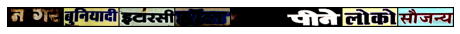

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['का', 'कालेत', 'आति', 'बेटी', 'भी', 'दिराग', 'कजलव', 'इसरी']
('का', 'कालोनी', 'शांति', 'बेटी', 'श्री', 'दिव्यांग', 'कंजलोचन', 'इटारसी')


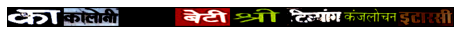

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['नासरे', 'नम', 'निकतन', 'रेल', 'री', 'सूदेशन', 'की', 'कायपालन']
('नासरे', 'नमः', 'निकेतन', 'रेल', 'पश्चिम', 'स्टेशन', 'की', 'कार्यपालन')


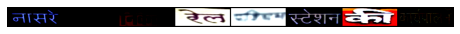

['पल', 'ऐट', 'भईई', 'देशह', 'लो', 'एव्', 'संदर', 'रंे']
('उपलब्ध', 'रेल', 'भाई', 'स्टेशन', 'प्रो', 'एवं', 'सेंटर', 'स्टे')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


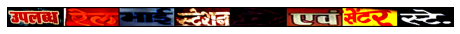

['इटारी', 'पातका', 'मिकती', 'कर', 'संध', 'मुनाफा', 'मदिदर', 'उनकी']
('इटारसी', 'पालिका', 'निक्की', 'करें', 'संघ', 'मुनाफा', 'मन्दिर', 'सबकी')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


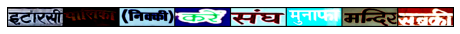

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['क', 'जकिी', 'तिशव', 'बेटी', 'भी', 'पर', 'सेवशन', 'पीने']
('के', 'जावेगी', 'विश्व', 'बेटी', 'सी', 'पर', 'सेक्शन', 'पीने')


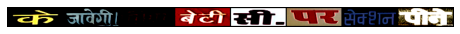

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['परिसर', 'एव्', 'आदि', 'वक', 'तमी', 'की', 'कमरे', 'आार']
('परिसर', 'एवं', 'आदि', 'के', 'वर्मा', 'की', 'कैमरे', 'मार्ट')


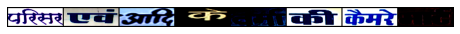

है------------------------ => है                  , gt: है                  
शा-----------दद----ीीी---- => शादी                , gt: शादी                
पर---िििव---ााल----क------ => परिवालक             , gt: परिचालक             
भर--------र--तत----------- => भररत                , gt: भारतीय              
का---------लल----सस------- => कालस                , gt: कॉल्स               
झु-----मम----ाननन----ाा--- => झुमाना              , gt: जुर्माना            
बं-------दद------ीी------- => बंदी                , gt: बैटरी               
मे-------ध----नन----ाा---- => मेधना               , gt: मेघना               
Test Loss: 0.234756, Accuray: 0.205023 Average BLEU 0.8399001540436506


tensor(0.2348, device='cuda:0')

In [ ]:
def imshow(img, batch_size):
    npimg = img.numpy()
    plt.figure(figsize=(batch_size, 2))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_batch_images(images,labels,gt_labels,batch_size):
    img = torchvision.utils.make_grid(images)
    print(labels)
    print(gt_labels)
    imshow(img, batch_size)

def test(net, data_loader, criterion, max_iter=1000, display_batches = 10):
    print('Start Testing')
    for p in crnn.parameters():
        p.requires_grad = False
    net.eval();val_iter = iter(data_loader)
    i = 0;n_correct = 0
    loss_avg = averager()

    max_iter = min(max_iter, len(data_loader))
    avg_bleu = 0.0;size = 0
    for i in range(max_iter):
        data = val_iter.next()
        i += 1
        cpu_images, cpu_texts = data
        batch_size = cpu_images.size(0)
        loadData(image, cpu_images)
        t, l = converter.encode(cpu_texts)
        loadData(text, t)
        loadData(length, l)

        preds = crnn(image)
        preds_size = Variable(torch.IntTensor([preds.size(0)] * batch_size))
        cost = criterion(preds, text, preds_size, length) / batch_size
        loss_avg.add(cost)

        _, preds = preds.max(2)
        preds = preds.transpose(1, 0).contiguous().view(-1)
        sim_preds = converter.decode(preds.data, preds_size.data, raw=False)

        for pred, target in zip(sim_preds, cpu_texts):
            # print(pred, '\t', target)
            if len(pred) >1 and len(target) >1: 
                avg_bleu += bleu(pred, target)*(len(target))
                size += len(target)
            if pred == target:
                n_correct += 1

        if i < display_batches:
            show_batch_images(cpu_images,sim_preds,cpu_texts,batch_size)
    
    raw_preds = converter.decode(preds.data, preds_size.data, raw=True)[:settings.test_batch_size]
    for raw_pred, pred, gt in zip(raw_preds, sim_preds, cpu_texts):
        print('%-20s => %-20s, gt: %-20s' % (raw_pred, pred, gt))
    accuracy = n_correct / float(max_iter * batch_size);avg_bleu /= size
    print('Test Loss: %f, Accuray: %f Average BLEU' % (loss_avg.val(), accuracy),avg_bleu)
    return loss_avg.val()

test(crnn, test_loader, criterion)